#### Student Depression Variable Imputation

**Name: Cesar Alonso Lopez Anguiano** 


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Dataset

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

#### Exploratory Data Analysis

In [4]:
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


In [5]:
print("\nResumen de información:")
df.info()


Resumen de información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [6]:
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Estadísticas descriptivas:


,Age,Income,Gender,Registered,City
count,103.000000,103.000000,84,103.000000,103
unique,NaN,NaN,8,NaN,4
top,NaN,NaN,Male,NaN,New York
freq,NaN,NaN,12,NaN,27
mean,29.573987,51079.867179,NaN,0.504854,NaN
std,13.137300,21167.304578,NaN,0.502421,NaN
min,-5.000000,-1000.000000,NaN,0.000000,NaN
25%,23.988273,37726.305475,NaN,0.000000,NaN
50%,28.843517,51028.444622,NaN,1.000000,NaN
75%,34.967142,58315.989946,NaN,1.000000,NaN


#### Data Cleaning

In [7]:
# --- Limpieza de valores extremos y errores ---
# Convertimos columnas numéricas y detectamos outliers
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

In [8]:
# Eliminamos edades y sueldos inválidos
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
df = df[(df['Income'] > 0) & (df['Income'] < 150000)]

In [9]:
# --- Limpieza de la variable Gender ---
print("\nValores únicos antes de limpieza en 'Gender':")
print(df['Gender'].unique())


Valores únicos antes de limpieza en 'Gender':
['Male' 'Female' 'MALE' 'FEMALE' 'male' 'female' 'femle' 'Femael' nan]


In [10]:
# Corrección de errores de escritura y estandarización
gender_map = {
    'male': 'Male', 'MALE': 'Male', 'Male': 'Male',
    'female': 'Female', 'FEMALE': 'Female', 'Female': 'Female',
    'femle': 'Female', 'Femael': 'Female', 'Femael': 'Female'
}
df['Gender'] = df['Gender'].map(gender_map)

In [11]:
# --- Imputación de valores faltantes ---
# Ver cuántos valores faltan
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Age            0
Income         0
Gender        20
Registered     0
City           0
dtype: int64


In [13]:
# Imputación de valores faltantes
# Edad e ingreso con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

In [14]:
# Gender con la moda
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [15]:
# Registered con moda
df['Registered'] = df['Registered'].fillna(df['Registered'].mode()[0])

In [ ]:
# City con moda
df['City'] = df['City'].fillna(df['City'].mode()[0])


In [16]:
# Verificar nuevamente valores faltantes
print("\nValores faltantes después de imputación:")
print(df.isnull().sum())


Valores faltantes después de imputación:
Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64


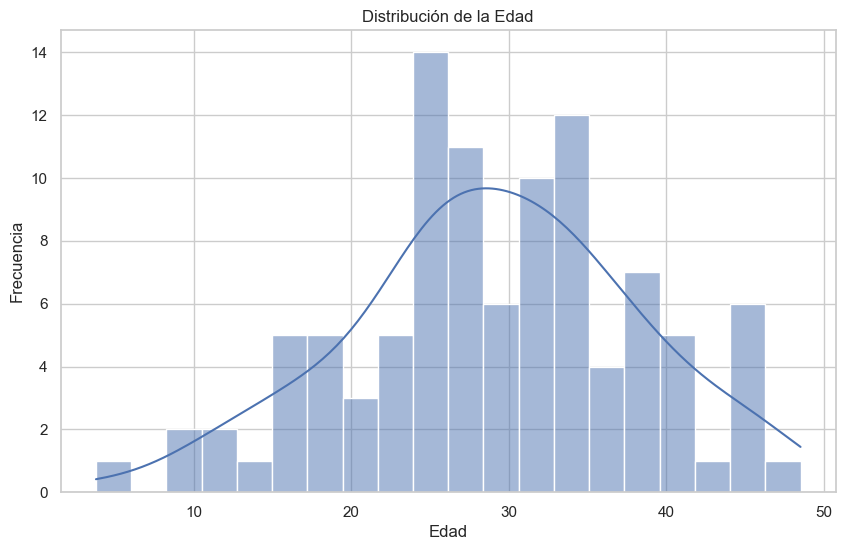

In [ ]:
# . ANÁLISIS EXPLORATORIO DE DATOS (EDA)

# Distribución de edades
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

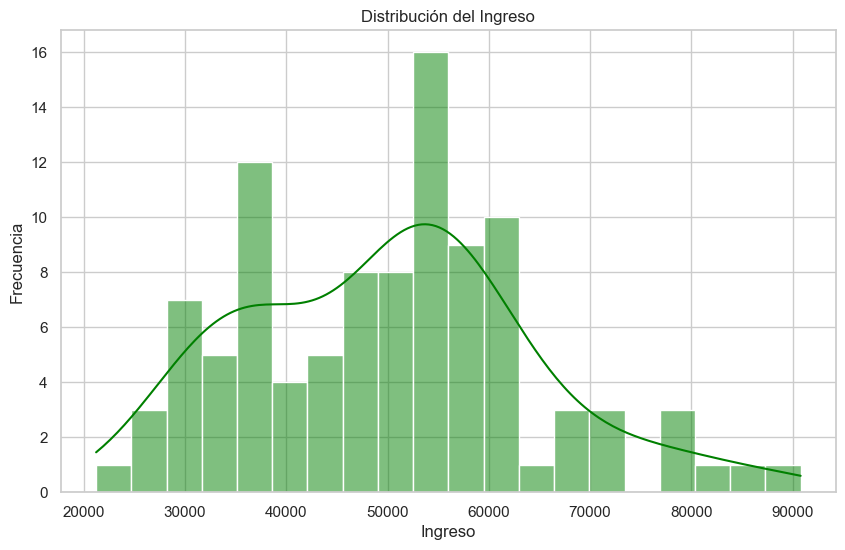

In [18]:
# Distribución de ingresos
sns.histplot(df['Income'], bins=20, kde=True, color='green')
plt.title("Distribución del Ingreso")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.show()


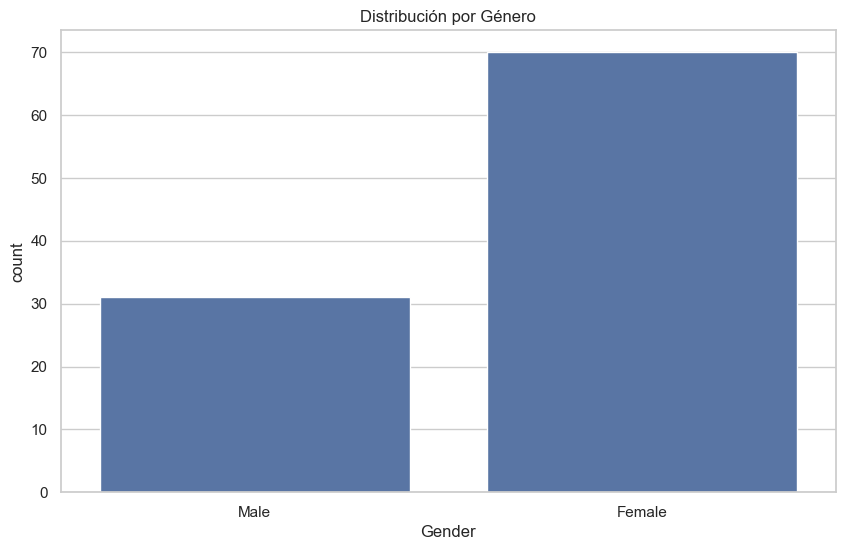

In [19]:
# Conteo de género
sns.countplot(data=df, x='Gender')
plt.title("Distribución por Género")
plt.show()

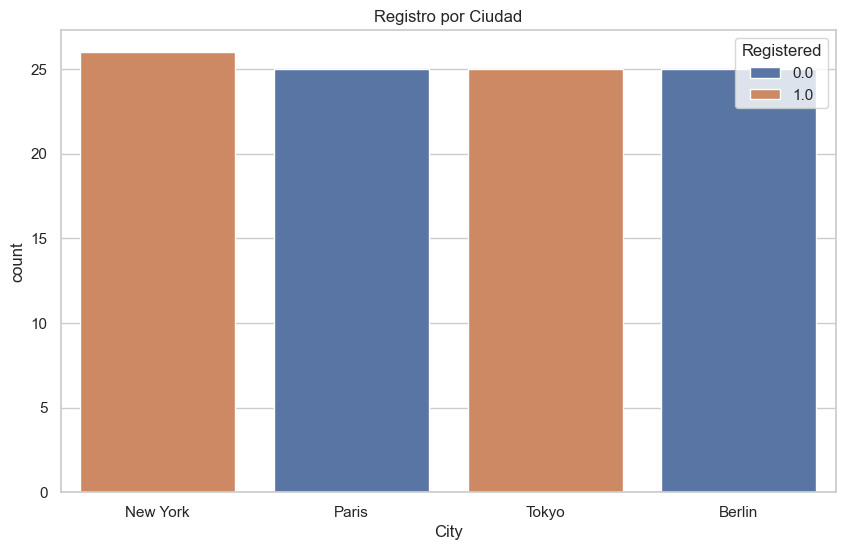

In [20]:
# Registro por ciudad
sns.countplot(data=df, x='City', hue='Registered')
plt.title("Registro por Ciudad")
plt.show()


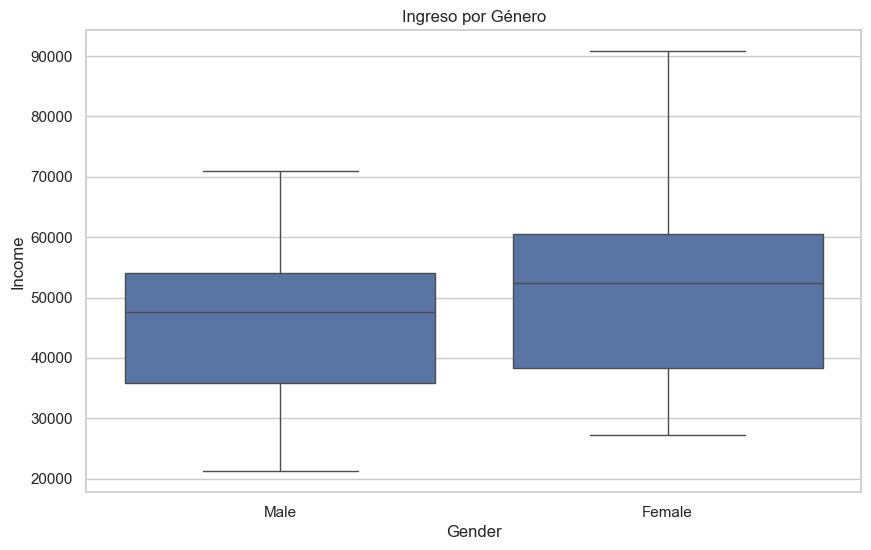

In [21]:
# Boxplot de ingreso por género
sns.boxplot(data=df, x='Gender', y='Income')
plt.title("Ingreso por Género")
plt.show()

In [ ]:
# . FEATURE ENGINEERING

# Crear rangos de edad
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100],
                         labels=['<18', '18-30', '30-45', '45-60', '60+'])

In [23]:
# Ingreso categorizado
df['Income_Level'] = pd.qcut(df['Income'], q=4,
                             labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])


In [24]:
# Codificación one-hot para variables categóricas
df_encoded = pd.get_dummies(df, columns=['Gender', 'City', 'Age_Group', 'Income_Level'], drop_first=True)


In [ ]:
# . ResultadoL

print("\nShape del dataframe final codificado:", df_encoded.shape)
print("Columnas finales:")
print(df_encoded.columns)



Shape del dataframe final codificado: (101, 14)
Columnas finales:
Index(['Age', 'Income', 'Registered', 'Gender_Male', 'City_New York',
       'City_Paris', 'City_Tokyo', 'Age_Group_18-30', 'Age_Group_30-45',
       'Age_Group_45-60', 'Age_Group_60+', 'Income_Level_Medio-Bajo',
       'Income_Level_Medio-Alto', 'Income_Level_Alto'],
      dtype='object')
